## 0. Librerías usadas

En este cuaderno usaremos ``numpy``,``scipy`` y ``matplotlib``. Esta celda importa estos paquetes y define que la salida de las gráficas se muestre en el cuaderno al correr la celda.

$$
\newcommand{\pap}[1]{\left(#1\right)}
\newcommand{\pas}[1]{\left[#1\right]}
\newcommand{\pac}[1]{\left\{#1\right\}}
\newcommand{\pav}[1]{\left\vert#1\right\vert}
\newcommand{\rv}{\vec{r}}
\newcommand{\rb}{\mathbf{r}}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xv}{\vec{x}}
\newcommand{\ome}{\omega}
\newcommand{\eps}{\epsilon}
\newcommand{\iun}{\hat{\boldsymbol{\imath}}}
\newcommand{\jun}{\hat{\boldsymbol{\jmath}}}
$$

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cfit
%matplotlib inline

## 1.1. Ajuste polinomial con **scypi**

En esta sección vamos a tomar como referencia 51 puntos igualmente espaciados en el intervalo $x\in\pas{0,5}$ de la función con ruido:
$$
f_{\eps}(x)=x(x-3)(x-5)+n_{\eps}(x)\; ,
\tag{1}
$$
donde $n_{\eps}(x)$ es un ruido gaussiano centrado en cero y con amplitud $\eps=1$. Comenzaremos haciendo un ajuste cuadrático y luego uno cúbico. En esta primera celda haremos los ajuste mediante la función `curve_fit` de `scipy` tal como se explica en el video de `Youtube`.

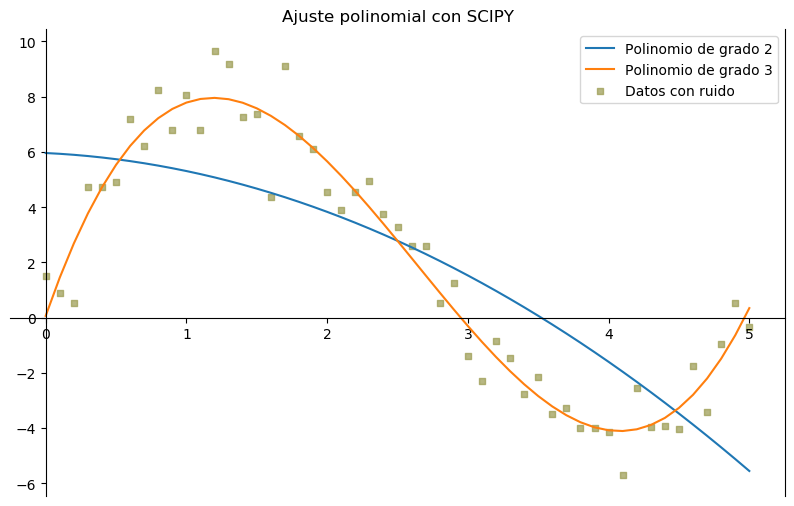

In [119]:
# Parámetros
xmin,xmax,npun,eps=0,5,51,1
# Array de x
x=np.linspace(xmin,xmax,npun)
# Array de f(x) con ruido
y=x*(x-3)*(x-5)+np.random.normal(0,eps,npun)
# Modelo cuadrático
p2=lambda x,a,b,c:a*x**2+b*x+c
popt,pcov=cfit(p2,x,y)
a,b,c=popt
yp2=p2(x,a,b,c)
# Modelo cúbico
p3=lambda x,a,b,c,d:a*x**3+b*x**2+c*x+d
popt,pcov=cfit(p3,x,y)
a,b,c,d=popt
yp3=p3(x,a,b,c,d)
#######################################
# Gráfica de la función
#######################################
plt.figure(figsize=(10,10/1.618),dpi=100)
plt.scatter(x,y,s=25,color=(0.6,0.6,0.3,0.7),marker='s')
plt.plot(x,yp2)
plt.plot(x,yp3)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_title('Ajuste polinomial con SCIPY')
plt.legend(['Polinomio de grado 2','Polinomio de grado 3','Datos con ruido'])
######################################

### 1.1.1 Comparando los coeficientes

Nótese que la función sin ruido es
$$
f(x)=x^3-8x^2+15x \;.
\tag{2}
$$
Por lo tanto, a pesar del ruido, se espera que el modelo polinomial de grado 3 tenga coeficientes similares a la función sin ruido. Por supuesto, no se espera muy buena cercanía de los coeficientes de grado 2 porque la forma de la función no se ajusta muy bien.

In [157]:
popt,pcov=cfit(p3,x,y)
a,b,c,d=popt
print("Los coeficientes del polinomio de grado 3 son, en orden descendiente de grado: {0:0.2f}, \
{1:0.2f}, {2:0.2f}, {3:0.2f}".format(a,b,c,d))
popt,pcov=cfit(p2,x,y)
a,b,c=popt
print("Los coeficientes del polinomio de grado 2 son, en orden descendiente de grado: {0:0.2f}, \
{1:0.2f}, {2:0.2f}".format(a,b,c))

Los coeficientes del polinomio de grado 3 son, en orden descendiente de grado: 1.00, -7.94, 14.66, 0.06
Los coeficientes del polinomio de grado 2 son, en orden descendiente de grado: -0.41, -0.24, 5.96


### 1.1.2 Gráficas de residuales y _underfitting_
Como ya vimos en las secciones anteriores, el polinomio de grado 2 es un muy mal modelo para los datos. Existe una manera de mostrar estos tanto gráficamente como numéricamente. 

Gráficamente, se hace mediante una **gráfica de residuales** que presentamos a continuación en para los polinomios de grado 2 y 3. Los residuales se definen como 
$$
r(x)=f_{\eps}(x)-p(x)
\tag{3}
$$ 
donde $p(x)$ es el ajuste o modelo. Note que, comparado con el grado 3, los residuales del polinomio de grado 2 son bastante más alejados de cero y además se evidencia que hay todavía una línea de tendencia en ellos, esto quiere decir que no se ha usado un modelo que capte bien la tendencia de los datos y esto se le conoce como **_subajuste_** o _underfitting_. Por el contrario en el modelo de grado 3 los residuales se comportan completamente como ruido, esto quiere decir que el modelo ya explica la tendencia general de los datos y el resto es ruido (errores no sistemáticos inevitables en la toma de datos).

Numéricamente, y tal como se muestra en el video, la bondad de ajuste se puede cuantificar mediante el error $\chi^2$ (léase **_ji cuadrado_**), definido como,
$$
\chi^2 = \sum_{i=1}^{N} r(x_i)^2 \;.
\tag{4}
$$
En realidad, es más recomendable usar el **_error reducido_** $\chi_{\nu}^2=\frac{\chi^2}{N-1}$ donde $N$ es el número de datos. 

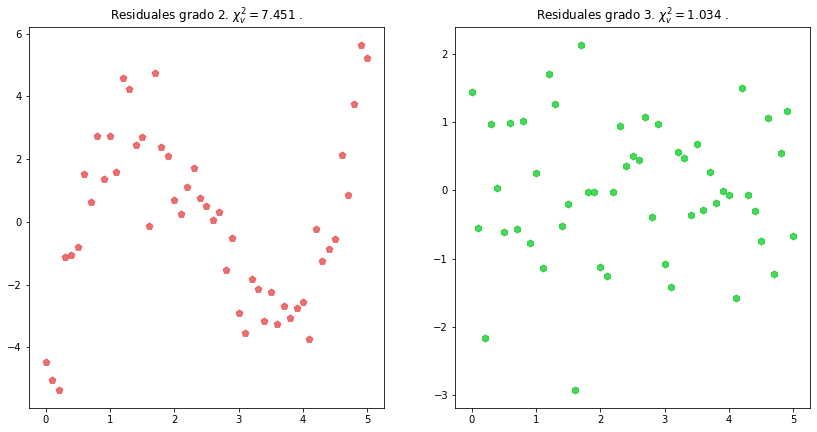

In [121]:
f=plt.figure(figsize=(14,7))
chis2=sum((y-yp2)**2)/(npun-1)
chis3=sum((y-yp3)**2)/(npun-1)
ax1 = f.add_subplot(121,title="Residuales grado 2. $\chi_v^2 = {0:0.3f}$ .".format(chis2))
ax2 = f.add_subplot(122,title="Residuales grado 3. $\chi_v^2 ={0:0.3f}$ .".format(chis3))
ax1.scatter(x,y-yp2,s=50,marker="p",color=(0.9,0.3,0.3,0.8))
ax2.scatter(x,y-yp3,s=50,marker="h",color=(0.1,0.8,0.2,0.8))

### 1.1.3. La matriz de covarianzas en **pcov**

Al usar `curve_fit` encontramos una matriz de covarianzas $C$. Un ejemplo para el caso del polinomo de grado 2 es:
$$
C_2=
\begin{bmatrix}
  0.0412 & -0.2059 &  0.1681\\
 -0.2059 &  1.1007 & -1.0189\\
  0.1681 & -1.0189 &  1.2866
\end{bmatrix}
$$
Un ejemplo para el polinomio de grado tres es:
$$
C_3=
\begin{bmatrix}
  0.0030 & -0.0227 &  0.0450 & -0.0178\\
 -0.0227 &  0.1755 & -0.3629 &  0.1543\\
  0.0450 & -0.3629 &  0.8036 & -0.3897\\
 -0.0178 &  0.1543 & -0.3897 &  0.2626
\end{bmatrix}
$$
Lo importante que noten es que la diagonal expresa la incertidumbre en cada de uno los parámetros del modelo (en este caso los coeficientes del polinomio) mientras que los elementos no diagonales expresan las correlaciones entre los modelos. Un mal ajuste se revela por números en esta matriz alejados de cero aunque la intepretación es distinta dependiendo de los valores diagonales y los no diagonales. En los valores diagonales la incertidumbre se puede deber al ruido no sistemático y en principio no debería preocupar demasiado. En cambio, si hay correlaciones no diagonales esto es un indicio de *underfitting*.

#### Nota:
Las tres celdas siguientes se usan para obtener en formato $\LaTeX$ las matrices de covarianza obtenidas en Python. No es necesario que ustedes las usen, las matrices de covarianza de su caso particular aleatorio pueden ser distintas.

In [108]:
import array_to_latex as a2l

In [114]:
popt,pcov=cfit(p2,x,y)
a2l.to_ltx(pcov,frmt = '{:0.4f}')

\begin{bmatrix}
  0.0412 & -0.2059 &  0.1681\\
 -0.2059 &  1.1007 & -1.0189\\
  0.1681 & -1.0189 &  1.2866
\end{bmatrix}


In [116]:
popt,pcov=cfit(p3,x,y)
a2l.to_ltx(pcov,frmt = '{:0.4f}')

\begin{bmatrix}
  0.0030 & -0.0227 &  0.0450 & -0.0178\\
 -0.0227 &  0.1755 & -0.3629 &  0.1543\\
  0.0450 & -0.3629 &  0.8036 & -0.3897\\
 -0.0178 &  0.1543 & -0.3897 &  0.2626
\end{bmatrix}


## 1.2. Ajuste polinomial con **numpy** 
El paquete `numpy` también tiene funciones de ajuste polinomial. Note el uso de las funciones `np.polyfit` y `np.poly1d`. Los resultados son los mismos que en el caso anterior porque en ambos casos se está usando el método de _**Mínimos cuadrados**_. 

### 1.2.1 Overfitting

Debido a que la sintaxis es más sencilla para polinomios de grado muy alto, acá se pone como ejemplo un ajuste con polinomio de grado quince que muestra el fenómeno conocido como _**sobreajuste**_ (*overfitting*). Como se puede ver, la curva se ajusta demasiado al ruido y no a la tendencia general del modelo. Esto implica que muy probablemente se están usando más parámetros de los necesarios en el modelo. Además, mirando las gráficas de residuales, nótese que no se ha ganado mejor ajuste con el modelo más complejo de grado quince que con el de grado 3, e incluso el ruido parece menos aleatorio como si hubiera todavía un **soslayo** (*bias*) en el modelo. Es más, ¡el valor de $\chi^2_{\nu}$ empeora!

El _overfitting_ tiene otra gran desventaja: un polinomio de grado quince tiene 16 parámetros, estos son demasiados para ser interpretados fácilmente. En estos casos es mejor usar la regla de la **_navaja de Occam_**, y buscar explicaciones más sencillas.

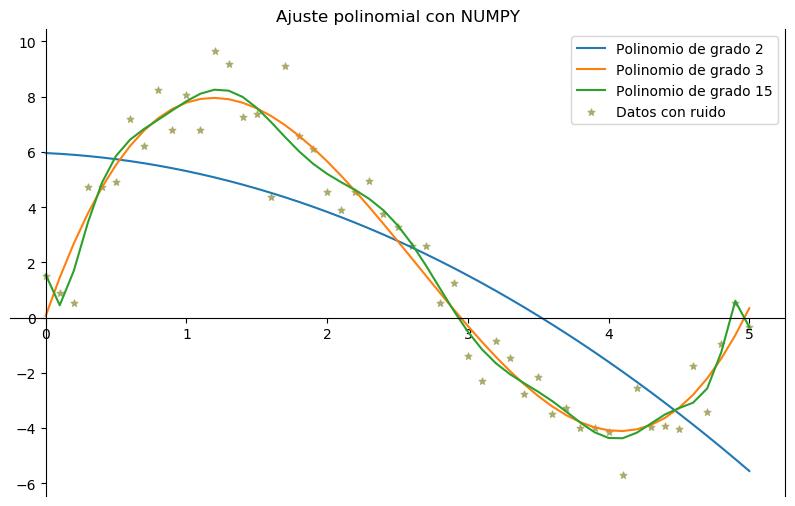

In [122]:
###################
# Modelo cuadrático
###################
z=np.polyfit(x,y,2)
# Función ajustada
f=np.poly1d(z)
yp2=f(x)
###################
# Modelo cúbico
###################
z=np.polyfit(x,y,3)
f=np.poly1d(z)
yp3=f(x)
###################
# Modelo grado 10
###################
z=np.polyfit(x,y,15)
f=np.poly1d(z)
yp10=f(x)
#######################################
# Gráfica de la función
#######################################
plt.figure(figsize=(10,10/1.618),dpi=100)
plt.scatter(x,y,s=25,color=(0.6,0.6,0.3,0.7),marker='*')
plt.plot(x,yp2)
plt.plot(x,yp3)
plt.plot(x,yp10)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_title('Ajuste polinomial con NUMPY')
plt.legend(['Polinomio de grado 2','Polinomio de grado 3','Polinomio de grado 15','Datos con ruido'])
######################################

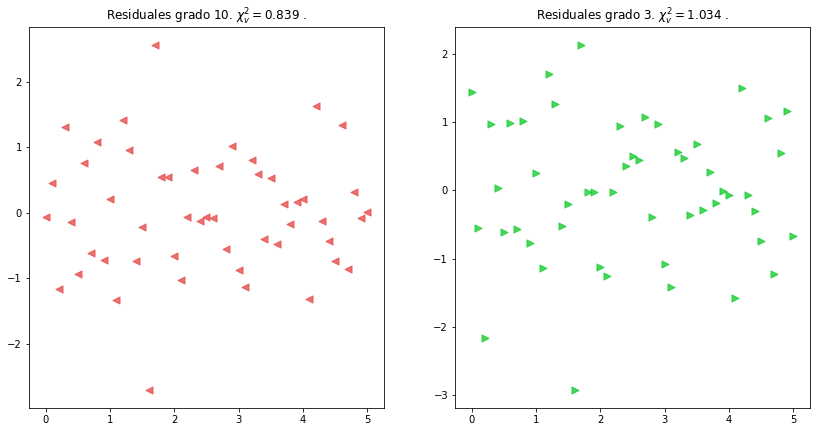

In [152]:
f=plt.figure(figsize=(14,7))
chis10=sum((y-yp10)**2)/(npun-1)
chis3=sum((y-yp3)**2)/(npun-1)
ax1 = f.add_subplot(121,title="Residuales grado 10. $\chi_v^2 = {0:0.3f}$ .".format(chis10))
ax2 = f.add_subplot(122,title="Residuales grado 3. $\chi_v^2 = {0:0.3f}$ .".format(chis3))
ax1.scatter(x,y-yp10,s=50,marker="<",color=(0.9,0.3,0.3,0.8))
ax2.scatter(x,y-yp3,s=50,marker=">",color=(0.1,0.8,0.2,0.8))

## 2. Ajuste no polinomial
Si se observa la gráfica de $f_{\eps}(x)$ se nota que tal vez un modelo sinusoidal (una función trigonométrica seno con amplitud, fase, frecuencia y desvío) podría no ser una aproximación tan mala. En este caso, propongamos como modelo
$$
h(x;\ome,\varphi,A,B)=A\sin(\ome x+\varphi)+B .
\tag{5}
$$
Como vemos, este modelo no es tan mal ajuste: el gráfico está relativamente bien ajustado, $\chi^2_{\nu}$ no es muy alto, y la matriz de covarianzas es prometedora. Sin embargo, la gráfica de residuales, aunque bastante buena, todavía muestra algo de soslayo. Es claro que la elección de un modelo sobre otro es un arte bastante sutil.


[ 1.193862   -0.03355121  5.95750132  1.85026398]
[[ 0.00067647 -0.00157687  0.00152924  0.00066897]
 [-0.00157687  0.00512391 -0.00366702 -0.00128839]
 [ 0.00152924 -0.00366702  0.05181252  0.00120098]
 [ 0.00066897 -0.00128839  0.00120098  0.02560051]]


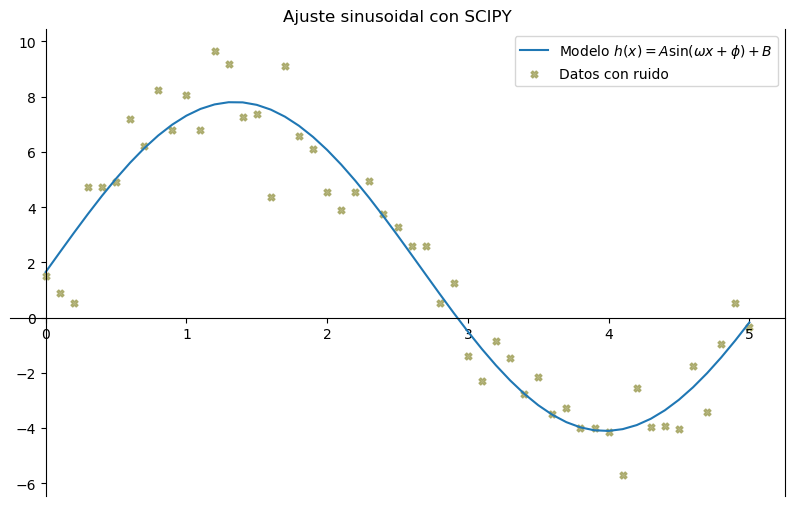

In [151]:
h=lambda x,ome,phi,A,B: A*np.sin(ome*x+phi)+B
popt,pcov=cfit(h,x,y)
ome,phi,A,B=popt
yh=h(x,ome,phi,A,B)
#######################################
# Gráfica de la función
#######################################
plt.figure(figsize=(10,10/1.618),dpi=100)
plt.scatter(x,y,s=25,color=(0.6,0.6,0.3,0.7),marker='X')
plt.plot(x,yh)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.set_title('Ajuste sinusoidal con SCIPY')
plt.legend(['Modelo $h(x)=A\sin(\omega x+\phi)+B$','Datos con ruido'],loc='best')
######################################
print(popt)
print(pcov)

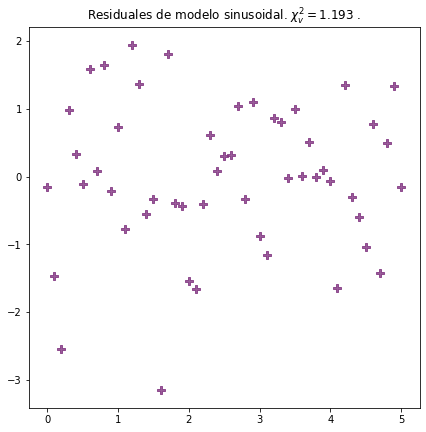

In [156]:
f=plt.figure(figsize=(7,7))
chish=sum((y-yh)**2)/(npun-1)
ax1 = f.add_subplot(111,title="Residuales de modelo sinusoidal. $\chi_v^2 = {0:0.3f}$ .".format(chish))
ax1.scatter(x,y-yh,s=50,marker="P",color=(0.5,0.2,0.5,0.8))